# Comparison of Salaries:

What is the average salary for U.S. workers in data-related positions, and how does it compare to the average salary for non-U.S. workers?
Are there specific roles or skill sets where the salary differences between U.S. and non-U.S. workers are more pronounced?
Prevailing Wage vs. Actual Salary for Non-U.S. Workers:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
excel_salary = 'salary_data_states.xlsx'
df = pd.read_excel(excel_salary)


In [4]:
# Display the first few rows of the dataframe
pd.set_option('display.max_columns', None)
display(df.head())

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,EXPERIENCE_REQUIRED_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,BLOOMINGTON,NaN,NaN,NaN,NaN,NaN,15-1132,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,NaN,IRAN,25-1011,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,HARLINGEN CISD,NaN,NaN,NaN,NaN,NaN,25-1042,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,PORTLAND,NaN,NaN,NaN,NaN,NaN,15-1133,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [17]:
# Filter for data-related positions
data_related_jobs = ['data analyst', 'data scientist', 'software engineer']
filtered_df = df[df['JOB_TITLE_SUBGROUP'].isin(data_related_jobs)]


In [18]:
# Filter for U.S. and non-U.S. workers
us_workers = filtered_df[filtered_df['COUNTRY_OF_CITIZENSHIP'] == 'UNITED STATES OF AMERICA']
non_us_workers = filtered_df[filtered_df['COUNTRY_OF_CITIZENSHIP'] != 'UNITED STATES OF AMERICA']

In [ ]:
# Print the DataFrame for U.S. workers
print("U.S. workers:")
print(us_workers)

# Print the DataFrame for non-U.S. workers
print("Non-U.S. workers:")
print(non_us_workers)


In [20]:
# Compare salaries of U.S. and non-U.S. workers
us_mean_salary = us_workers['PREVAILING_WAGE_PER_YEAR'].mean()
non_us_mean_salary = non_us_workers['PREVAILING_WAGE_PER_YEAR'].mean()
salary_difference = us_mean_salary - non_us_mean_salary

print("Average prevailing wage per year for U.S. workers:", us_mean_salary)
print("Average prevailing wage per year for non-U.S. workers:", non_us_mean_salary)
print("Salary difference:", salary_difference)

Average prevailing wage per year for U.S. workers: 88853.33333333333
Average prevailing wage per year for non-U.S. workers: 83358.56479691542
Salary difference: 5494.768536417905


In [22]:
# Check for disparities in prevailing wages and actual salaries
prevailing_wage_disparity = filtered_df['PREVAILING_WAGE_PER_YEAR'].std()
actual_salary_disparity = filtered_df['PAID_WAGE_PER_YEAR'].std()

print("Disparity in prevailing wages:", prevailing_wage_disparity)
print("Disparity in actual salaries:", actual_salary_disparity)

Disparity in prevailing wages: 22137.7572298552
Disparity in actual salaries: 30166.77289953937


In [25]:
# Create a table with the comparison results
comparison_table = pd.DataFrame({
    "Measure": ["Average Prevailing Wage", "Disparity"],
    "U.S. Workers": [us_mean_salary, prevailing_wage_disparity],
    "Non-U.S. Workers": [non_us_mean_salary, actual_salary_disparity]
})

# Print the table
print(comparison_table.to_string(index=False))

                Measure  U.S. Workers  Non-U.S. Workers
Average Prevailing Wage  88853.333333      83358.564797
              Disparity  22137.757230      30166.772900


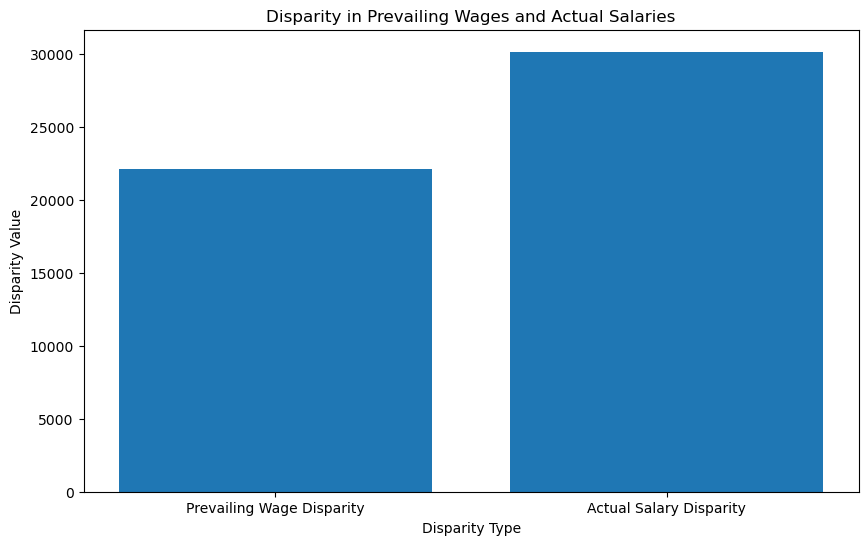

In [26]:
import matplotlib.pyplot as plt

# Create bar chart data
disparities = [prevailing_wage_disparity, actual_salary_disparity]
labels = ['Prevailing Wage Disparity', 'Actual Salary Disparity']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, disparities)
plt.xlabel('Disparity Type')
plt.ylabel('Disparity Value')
plt.title('Disparity in Prevailing Wages and Actual Salaries')
plt.show()

# Insights:
-U.S. workers earn about $5,500 more per year than non-U.S. workers.
-The difference in pay between U.S. and non-U.S. workers is about $8,000 per year.
